In [89]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import cv2
import os
import warnings
from skimage.io import imread
warnings.filterwarnings('ignore')

#Nikhita

### Creating Validation CSV

In [2]:
IMG_DIR = '/Users/Nikki/Downloads/ML_proj_test/data3a/validation/01-minor'
for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('val_0_minor.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [13]:
IMG_DIR = '/Users/Nikki/Downloads/ML_proj_test/data3a/validation/02-moderate'

for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('val_1_moderate.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

In [14]:
IMG_DIR = '/Users/Nikki/Downloads/ML_proj_test/data3a/validation/03-severe'

for img in os.listdir(IMG_DIR):
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))

    img_array = (img_28x28.flatten())

    img_array  = img_array.reshape(-1,1).T

    with open('val_2_severe.csv', 'ab') as f:

        np.savetxt(f, img_array, delimiter=",")

In [5]:
val_minor = pd.read_csv("val_0_minor.csv", header=None)

columnnames = {}
count = 0
for i in val_minor.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
val_minor.rename(columns = columnnames ,inplace = True)

val_minor['label'] = 0
val_minor.head()

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,90.0,96.0,45.0,8.0,13.0,11.0,10.0,15.0,29.0,27.0,...,14.0,25.0,37.0,26.0,22.0,24.0,19.0,18.0,25.0,0
1,142.0,168.0,168.0,176.0,183.0,181.0,182.0,178.0,181.0,182.0,...,30.0,35.0,30.0,32.0,36.0,45.0,48.0,42.0,54.0,0
2,196.0,206.0,206.0,206.0,205.0,203.0,202.0,201.0,200.0,199.0,...,123.0,122.0,120.0,121.0,120.0,122.0,122.0,122.0,121.0,0
3,90.0,80.0,89.0,61.0,70.0,86.0,147.0,80.0,107.0,123.0,...,99.0,97.0,95.0,95.0,94.0,93.0,94.0,94.0,94.0,0
4,40.0,73.0,68.0,61.0,70.0,57.0,142.0,157.0,151.0,151.0,...,49.0,49.0,46.0,43.0,40.0,39.0,38.0,37.0,35.0,0


In [6]:
val_severe = pd.read_csv("val_2_severe.csv", header=None)

columnnames = {}
count = 0
for i in val_severe.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
val_severe.rename(columns = columnnames ,inplace = True)

val_severe['label'] = 2
val_severe.head()

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,142.0,151.0,159.0,168.0,168.0,170.0,175.0,178.0,178.0,184.0,...,25.0,58.0,157.0,168.0,156.0,127.0,108.0,89.0,40.0,2
1,131.0,131.0,183.0,213.0,169.0,42.0,86.0,55.0,28.0,25.0,...,205.0,202.0,206.0,249.0,252.0,250.0,252.0,251.0,255.0,2
2,180.0,175.0,169.0,158.0,155.0,138.0,125.0,123.0,137.0,133.0,...,78.0,89.0,89.0,89.0,88.0,87.0,88.0,90.0,90.0,2
3,107.0,144.0,102.0,78.0,134.0,119.0,141.0,167.0,168.0,181.0,...,118.0,117.0,136.0,142.0,155.0,165.0,169.0,167.0,175.0,2
4,0.0,1.0,2.0,11.0,9.0,0.0,25.0,29.0,37.0,42.0,...,0.0,1.0,2.0,2.0,3.0,6.0,5.0,1.0,0.0,2


In [7]:
val_moderate = pd.read_csv("val_1_moderate.csv", header=None)

columnnames = {}
count = 0
for i in val_moderate.columns:
  count += 1
  columnnames[i] = f"Pix_{count}"
val_moderate.rename(columns = columnnames ,inplace = True)


val_moderate['label'] = 1
val_moderate.head()

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,124.0,116.0,185.0,185.0,174.0,173.0,209.0,151.0,135.0,162.0,...,148.0,152.0,154.0,156.0,157.0,155.0,151.0,149.0,148.0,1
1,158.0,133.0,130.0,125.0,138.0,147.0,152.0,156.0,156.0,155.0,...,17.0,17.0,21.0,24.0,28.0,30.0,32.0,34.0,38.0,1
2,203.0,236.0,195.0,164.0,145.0,143.0,98.0,64.0,59.0,83.0,...,18.0,84.0,109.0,112.0,83.0,28.0,58.0,69.0,67.0,1
3,251.0,251.0,248.0,247.0,245.0,132.0,69.0,95.0,41.0,53.0,...,50.0,46.0,43.0,40.0,40.0,39.0,38.0,40.0,48.0,1
4,161.0,167.0,156.0,169.0,183.0,184.0,199.0,195.0,179.0,176.0,...,9.0,10.0,14.0,20.0,35.0,80.0,97.0,89.0,79.0,1


#### Final Validation csv file with all the labels

In [8]:
val_data=pd.concat([val_minor,val_moderate,val_severe], ignore_index=True)
val_data.shape

(248, 785)

In [9]:
val_severe.tail()

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
86,233.0,217.0,176.0,117.0,64.0,79.0,126.0,96.0,73.0,89.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
87,94.0,87.0,92.0,108.0,144.0,162.0,178.0,166.0,188.0,126.0,...,135.0,227.0,137.0,91.0,83.0,40.0,46.0,38.0,38.0,2
88,236.0,236.0,237.0,237.0,238.0,240.0,242.0,242.0,243.0,243.0,...,241.0,240.0,241.0,242.0,240.0,241.0,241.0,241.0,240.0,2
89,70.0,103.0,97.0,91.0,77.0,98.0,124.0,113.0,126.0,129.0,...,155.0,147.0,129.0,92.0,81.0,83.0,76.0,79.0,100.0,2
90,98.0,99.0,96.0,92.0,91.0,92.0,100.0,95.0,151.0,139.0,...,245.0,229.0,211.0,178.0,150.0,143.0,136.0,127.0,130.0,2


In [10]:
val_data.to_csv('validation_data.csv')

In [11]:
df = pd.read_csv('data_training.csv', index_col = 0)

In [12]:
df['label'] = df['label'].replace(3, 2)

### Combining Training and Validation data

In [13]:
data = pd.concat([df,val_data], ignore_index=True)

In [14]:
type(data)

pandas.core.frame.DataFrame

In [39]:
dfA = pd.read_csv('car_damage.csv', index_col = 0)

In [40]:
dfA.shape

(1631, 785)

In [16]:
dfA.to_csv('car_damage.csv')

In [17]:
val_data = pd.read_csv('validation_data.csv', index_col = 0)

In [18]:
val_data.head(10)

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,90.0,96.0,45.0,8.0,13.0,11.0,10.0,15.0,29.0,27.0,...,14.0,25.0,37.0,26.0,22.0,24.0,19.0,18.0,25.0,0
1,142.0,168.0,168.0,176.0,183.0,181.0,182.0,178.0,181.0,182.0,...,30.0,35.0,30.0,32.0,36.0,45.0,48.0,42.0,54.0,0
2,196.0,206.0,206.0,206.0,205.0,203.0,202.0,201.0,200.0,199.0,...,123.0,122.0,120.0,121.0,120.0,122.0,122.0,122.0,121.0,0
3,90.0,80.0,89.0,61.0,70.0,86.0,147.0,80.0,107.0,123.0,...,99.0,97.0,95.0,95.0,94.0,93.0,94.0,94.0,94.0,0
4,40.0,73.0,68.0,61.0,70.0,57.0,142.0,157.0,151.0,151.0,...,49.0,49.0,46.0,43.0,40.0,39.0,38.0,37.0,35.0,0
5,82.0,82.0,82.0,81.0,80.0,84.0,86.0,87.0,86.0,87.0,...,27.0,33.0,43.0,66.0,66.0,91.0,107.0,111.0,145.0,0
6,203.0,203.0,204.0,250.0,255.0,220.0,211.0,235.0,228.0,221.0,...,95.0,89.0,87.0,85.0,87.0,81.0,78.0,75.0,79.0,0
7,206.0,255.0,254.0,254.0,254.0,170.0,28.0,19.0,20.0,14.0,...,125.0,146.0,144.0,145.0,146.0,153.0,162.0,139.0,117.0,0
8,59.0,104.0,81.0,99.0,185.0,179.0,153.0,150.0,146.0,141.0,...,18.0,18.0,50.0,127.0,165.0,162.0,138.0,183.0,153.0,0
9,41.0,36.0,59.0,31.0,130.0,180.0,47.0,74.0,69.0,102.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,0


In [41]:
dfA.head(15)

,Pix_1,Pix_2,Pix_3,Pix_4,Pix_5,Pix_6,Pix_7,Pix_8,Pix_9,Pix_10,...,Pix_776,Pix_777,Pix_778,Pix_779,Pix_780,Pix_781,Pix_782,Pix_783,Pix_784,label
0,165.0,165.0,164.0,165.0,166.0,162.0,203.0,150.0,152.0,171.0,...,98.0,96.0,94.0,114.0,124.0,128.0,100.0,106.0,93.0,0
1,60.0,77.0,103.0,115.0,143.0,144.0,148.0,152.0,154.0,155.0,...,121.0,123.0,116.0,111.0,112.0,105.0,106.0,102.0,99.0,0
2,171.0,207.0,150.0,114.0,142.0,121.0,97.0,50.0,51.0,61.0,...,104.0,104.0,106.0,111.0,112.0,111.0,116.0,114.0,115.0,0
3,117.0,115.0,112.0,111.0,108.0,105.0,97.0,76.0,64.0,56.0,...,47.0,57.0,76.0,93.0,87.0,81.0,96.0,138.0,190.0,0
4,107.0,105.0,98.0,113.0,116.0,107.0,109.0,115.0,105.0,114.0,...,42.0,43.0,45.0,48.0,46.0,47.0,104.0,126.0,118.0,0
5,52.0,93.0,83.0,61.0,69.0,70.0,72.0,72.0,73.0,74.0,...,123.0,57.0,88.0,81.0,92.0,93.0,65.0,97.0,160.0,0
6,42.0,43.0,62.0,102.0,126.0,134.0,118.0,90.0,81.0,92.0,...,171.0,144.0,106.0,138.0,149.0,97.0,47.0,62.0,62.0,0
7,2.0,2.0,2.0,2.0,3.0,3.0,4.0,4.0,5.0,6.0,...,83.0,77.0,80.0,78.0,81.0,84.0,80.0,75.0,68.0,0
8,148.0,199.0,87.0,72.0,63.0,61.0,62.0,92.0,155.0,110.0,...,97.0,86.0,69.0,66.0,65.0,75.0,103.0,141.0,139.0,0
9,12.0,7.0,5.0,6.0,11.0,14.0,13.0,3.0,4.0,4.0,...,78.0,75.0,74.0,73.0,74.0,71.0,63.0,66.0,67.0,0


#### Define X and y

In [42]:
X=dfA.iloc[:,:-1]
y =dfA.iloc[:,-1]

In [43]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1626    2
1627    2
1628    2
1629    2
1630    2
Name: label, Length: 1631, dtype: int64

### Defining training and testing data

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree Model

In [45]:
model1 = DecisionTreeClassifier(max_depth=3, criterion = 'gini')
model1.fit(X_train,y_train)
predictions1 = model1.predict(X_test)
predictions1_train = model1.predict(X_train)

In [46]:
print(confusion_matrix(y_test,predictions1))

[[73 60 49]
 [49 55 53]
 [52 86 62]]


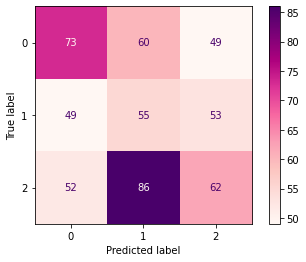

In [47]:
cm = confusion_matrix(y_test, predictions1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model1.classes_)
disp.plot(cmap='RdPu')
plt.show()

In [48]:
accuracy_dt = accuracy_score(y_test, predictions1)
report_dt = classification_report(y_test, predictions1, output_dict=True)
DT_precision =  report_dt['macro avg']['precision'] 
DT_recall = report_dt['macro avg']['recall']    
DT_f1 = report_dt['macro avg']['f1-score']

In [49]:
print('Testing Set Accuracy')
print(classification_report(y_test,predictions1))
print(accuracy_score(y_test, predictions1))
print('Training Set Accuracy')
print(classification_report(y_train,predictions1_train))
print(accuracy_score(y_train, predictions1_train))

Testing Set Accuracy
              precision    recall  f1-score   support

           0       0.42      0.40      0.41       182
           1       0.27      0.35      0.31       157
           2       0.38      0.31      0.34       200

    accuracy                           0.35       539
   macro avg       0.36      0.35      0.35       539
weighted avg       0.36      0.35      0.35       539

0.3525046382189239
Training Set Accuracy
              precision    recall  f1-score   support

           0       0.55      0.51      0.53       352
           1       0.45      0.50      0.47       381
           2       0.56      0.52      0.54       359

    accuracy                           0.51      1092
   macro avg       0.52      0.51      0.51      1092
weighted avg       0.52      0.51      0.51      1092

0.510989010989011


#### The accuracies for different max depths

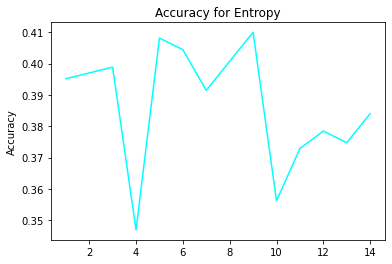

In [50]:
max_depth = list(range(1, 15))
scores = []
for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(max_depth, scores, c = 'cyan')
plt.title('Accuracy for Entropy')
plt.ylabel('Accuracy')
plt.show()

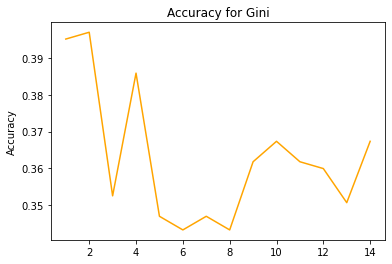

In [51]:
max_depth = list(range(1, 15))
scores = []
for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(max_depth, scores, c = 'orange')
plt.title('Accuracy for Gini')
plt.ylabel('Accuracy')
plt.show()

### Decision Tree model with grid search cv

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : range(1,15),
              'criterion' :['gini', 'entropy'],
              'min_samples_split': [2, 3, 4]
             }

In [53]:
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=4, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits


/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set 

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4]},
             verbose=True)

In [54]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='auto',
                       random_state=1024)

In [55]:
final_model.fit(X_train,y_train)
predictions1 = final_model.predict(X_test)
predictions1_train = final_model.predict(X_train)

/Users/Nikki/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [56]:
print(confusion_matrix(y_test,predictions1))

[[80 52 50]
 [58 48 51]
 [64 57 79]]


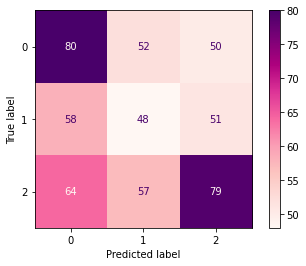

In [57]:
cm = confusion_matrix(y_test, predictions1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model1.classes_)
disp.plot(cmap='RdPu')
plt.show()

In [58]:
Accuracy_grid = accuracy_score(y_test, predictions1)
report_grid = classification_report(y_test, predictions1, output_dict=True)
grid_pre =  report_grid['macro avg']['precision'] 
grid_recall = report_grid['macro avg']['recall']    
grid_f1 = report_grid['macro avg']['f1-score']

In [59]:
print('Testing Set Accuracy')
print(classification_report(y_test,predictions1))
print(accuracy_score(y_test, predictions1))
print('Training Set Accuracy')
print(classification_report(y_train,predictions1_train))
print(accuracy_score(y_train, predictions1_train))

Testing Set Accuracy
              precision    recall  f1-score   support

           0       0.40      0.44      0.42       182
           1       0.31      0.31      0.31       157
           2       0.44      0.40      0.42       200

    accuracy                           0.38       539
   macro avg       0.38      0.38      0.38       539
weighted avg       0.39      0.38      0.38       539

0.38404452690166974
Training Set Accuracy
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       352
           1       0.92      0.73      0.82       381
           2       0.87      0.89      0.88       359

    accuracy                           0.84      1092
   macro avg       0.85      0.85      0.84      1092
weighted avg       0.85      0.84      0.84      1092

0.8424908424908425


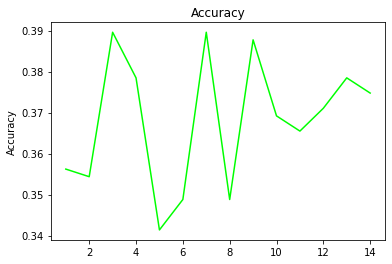

In [90]:
max_depth = list(range(1, 15))
scores = []
for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i, max_features='auto', min_samples_split=4,
                       random_state=1024)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(max_depth, scores, 'lime')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.show()

#### Accuracy

<BarContainer object of 2 artists>

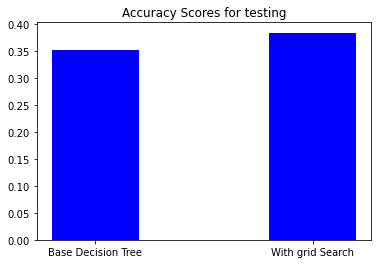

In [61]:
data = {'Base Decision Tree':accuracy_dt, 'With grid Search':Accuracy_grid}
courses = list(data.keys())
values = list(data.values())
plt.title('Accuracy Scores for testing')
plt.bar(courses, values, color ='blue',width = 0.4)

#### Precision

<BarContainer object of 2 artists>

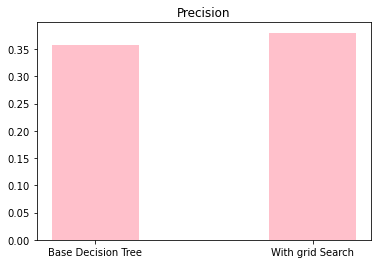

In [62]:
data = {'Base Decision Tree':DT_precision, 'With grid Search':grid_pre}
courses = list(data.keys())
values = list(data.values())
plt.title('Precision')
plt.bar(courses, values, color ='pink',width = 0.4)

#### Recall

<BarContainer object of 2 artists>

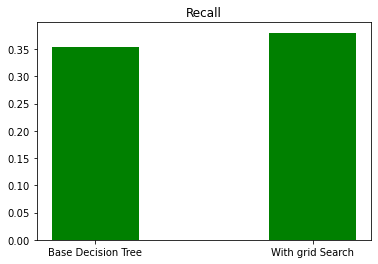

In [63]:
data = {'Base Decision Tree':DT_recall, 'With grid Search':grid_recall}
courses = list(data.keys())
values = list(data.values())
plt.title('Recall')
plt.bar(courses, values, color ='green',width = 0.4)

#### F1 Score

<BarContainer object of 2 artists>

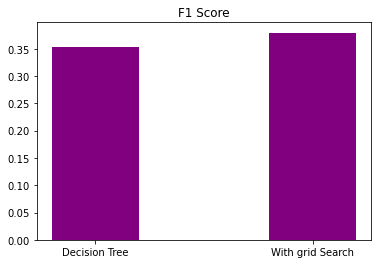

In [64]:
data = {'Decision Tree':DT_f1, 'With grid Search':grid_f1}
courses = list(data.keys())
values = list(data.values())
plt.title('F1 Score')
plt.bar(courses, values, color ='purple',width = 0.4)